In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

import sys
import os
sys.path.append(os.path.abspath('../'))
from dataset import SNPmarkersDataset

In [2]:
train_dataset = SNPmarkersDataset(mode="train", dir_path= "../../Data")
validation_dataset = SNPmarkersDataset(mode="validation", dir_path= "../../Data")
test_dataset = SNPmarkersDataset(mode="test", dir_path= "../../Data")

# Phenotype statistics

In [3]:
train_phenotypes_df = pd.DataFrame.from_dict(train_dataset.phenotypes)
validation_phenotypes_df = pd.DataFrame.from_dict(validation_dataset.phenotypes)
test_phenotypes_df = pd.DataFrame.from_dict(test_dataset.phenotypes)


means = pd.DataFrame([np.mean(train_phenotypes_df, axis = 0), np.mean(validation_phenotypes_df, axis = 0), np.mean(test_phenotypes_df, axis = 0)], index = ["Train", "Validation", "Test"])
print("Means: ")
print(means)
print("\n\n")

print("/////////////////////////////////////////////////////////////////////////////////")
covariance_df = train_phenotypes_df.cov()
print("Covariance matrix for the training dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = validation_phenotypes_df.cov()
print("Covariance matrix for the validation dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = test_phenotypes_df.cov()
print("Covariance matrix for the test dataset: ")
print(covariance_df)
print("/////////////////////////////////////////////////////////////////////////////////")
print("\n\n")

correlation_df = train_phenotypes_df.corr()
print("Correlation matrix for the training dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = validation_phenotypes_df.corr()
print("Correlation matrix for the validation dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = test_phenotypes_df.corr()
print("Correlation matrix for the test dataset: ")
print(correlation_df)

Means: 
              ep_res    de_res  FESSEp_res  FESSEa_res  size_res  MUSC_res
Train       3.387846  5.085675    3.311696    3.243987 -3.624854  2.873882
Validation  3.637300  5.442487    3.360156    3.322968 -2.879246  2.900952
Test        3.789484  5.678984    3.550566    3.568580 -3.120654  3.050898



/////////////////////////////////////////////////////////////////////////////////
Covariance matrix for the training dataset: 
              ep_res     de_res  FESSEp_res  FESSEa_res   size_res  MUSC_res
ep_res      4.206435   5.517636    2.118707    2.311481  -3.281250  2.815172
de_res      5.517636  14.864966    3.144851    3.704187  -7.119112  5.095297
FESSEp_res  2.118707   3.144851    2.748370    2.019781  -1.866149  2.162272
FESSEa_res  2.311481   3.704187    2.019781    2.584275  -2.148035  2.244017
size_res   -3.281250  -7.119112   -1.866149   -2.148035  59.317546 -2.934699
MUSC_res    2.815172   5.095297    2.162272    2.244017  -2.934699  3.009388
-----------------------

# Kolmogorov-smirnov test results

Statistical test for the distribution match of two samples ([wikipedia](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)). A small p values would suggest to reject that the null hypothesis is wrong, ie that the distribution of the two samples isn't the same.

In [4]:
for pheno in train_dataset.phenotypes.keys():
    print(f"Two samples ks test for {pheno} : ")
    print(f"Train-validation p value: {kstest(train_phenotypes_df[pheno].dropna(), validation_phenotypes_df[pheno].dropna()).pvalue}")
    print(f"Train-test p value: {kstest(train_phenotypes_df[pheno].dropna(), test_phenotypes_df[pheno].dropna()).pvalue}")
    print(f"Validation-test p value: {kstest(test_phenotypes_df[pheno].dropna(), validation_phenotypes_df[pheno].dropna()).pvalue}")
    print("--------------------------------------------------------------------------------------------------------------------")

Two samples ks test for ep_res : 
Train-validation p value: 3.112038924522215e-05
Train-test p value: 3.621481720049918e-27
Validation-test p value: 0.08157421771676772
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for de_res : 
Train-validation p value: 0.0011465444037697366
Train-test p value: 2.316003240866912e-13
Validation-test p value: 0.10065557484934275
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for FESSEp_res : 
Train-validation p value: 0.008704475242711443
Train-test p value: 1.9294544748689545e-18
Validation-test p value: 0.00021397528091270104
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for FESSEa_res : 
Train-validation p value: 0.04000196746147189
Train-test p value: 4.732330211047234e-26
Validatio

# Phenotype histogram visualisation

Create box plots and ecdf plots to better visualize and analyse the differents datasets for each phenotype

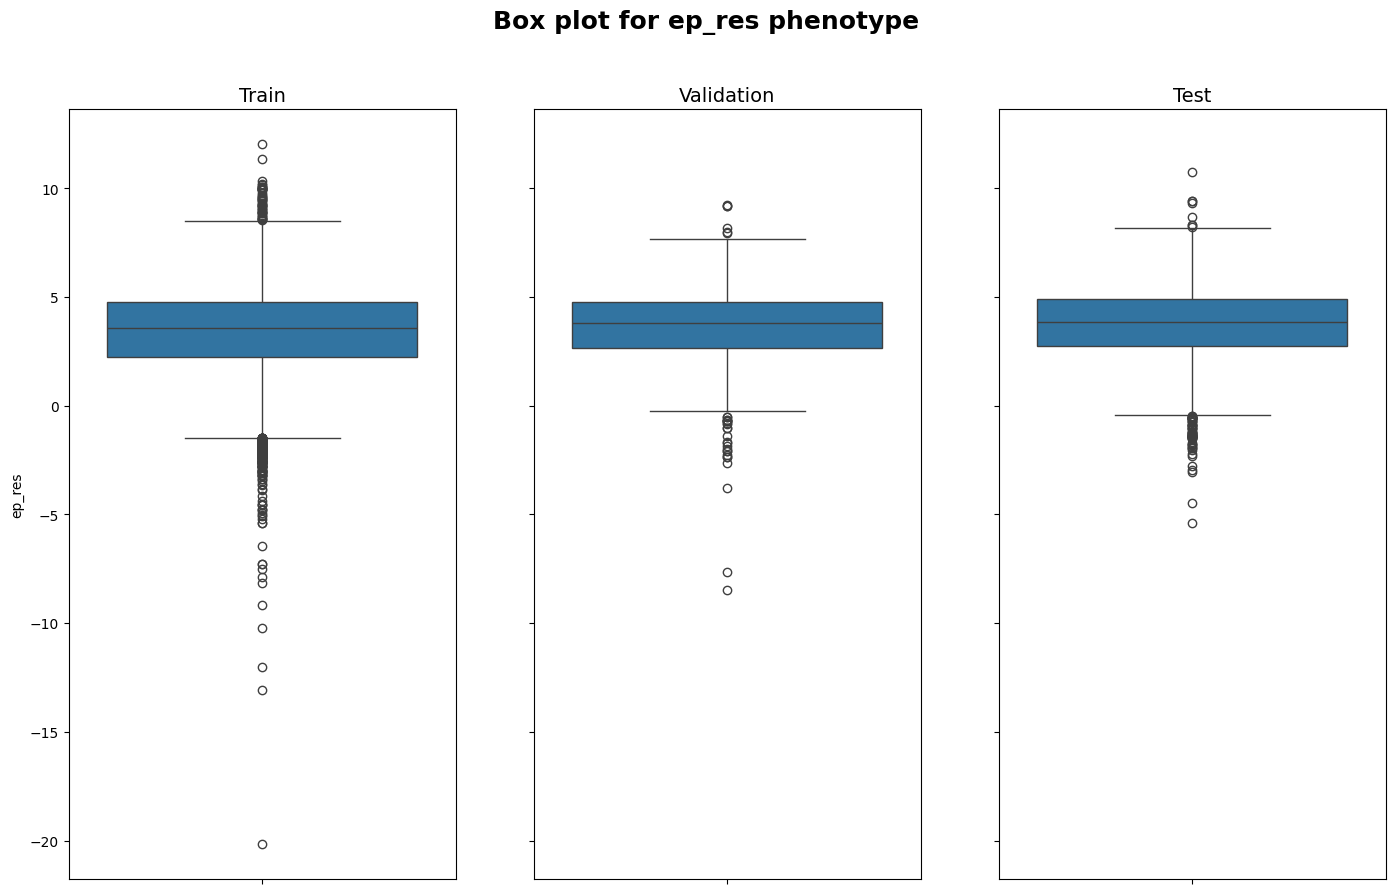

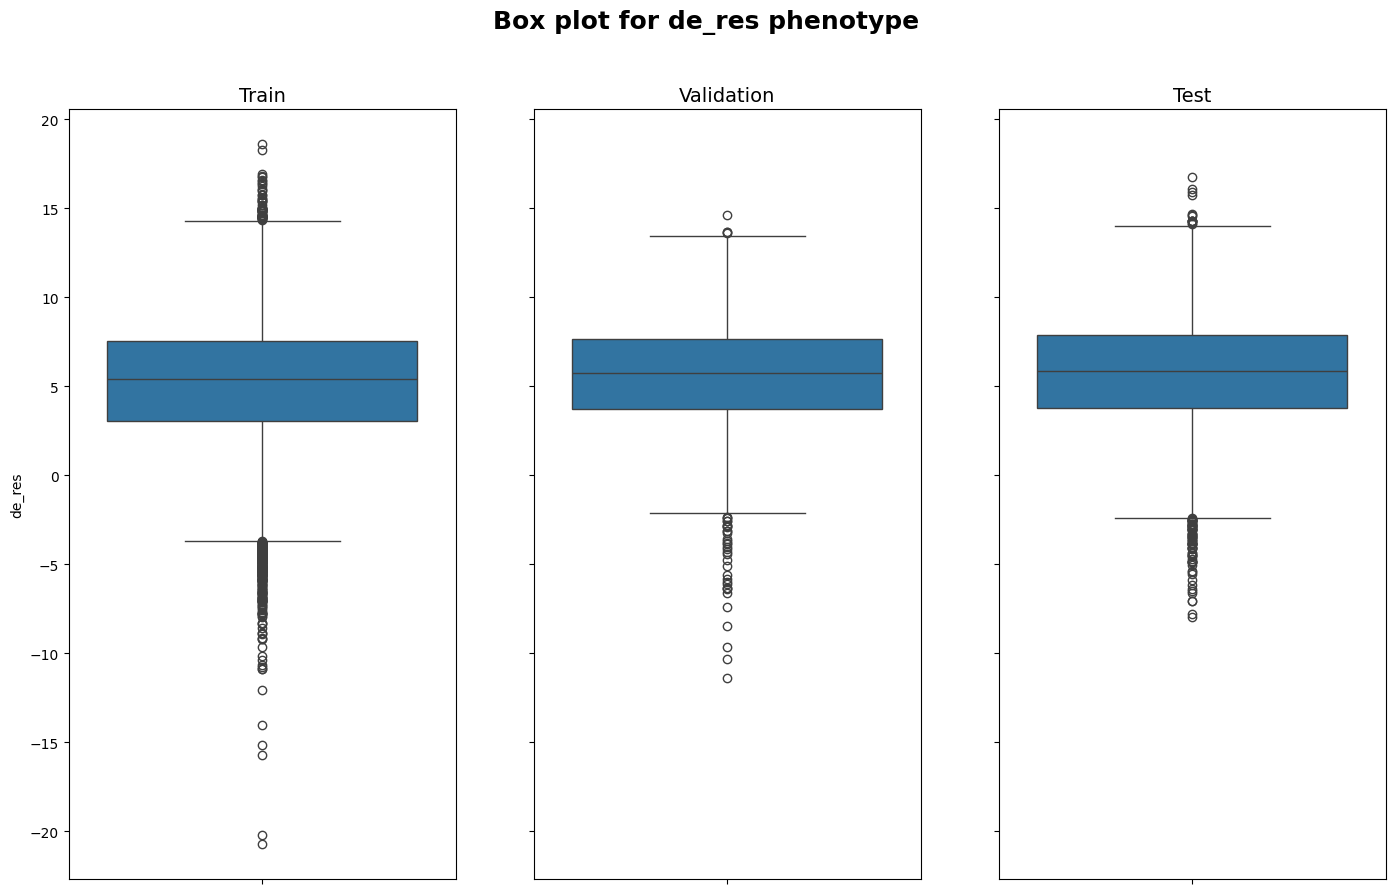

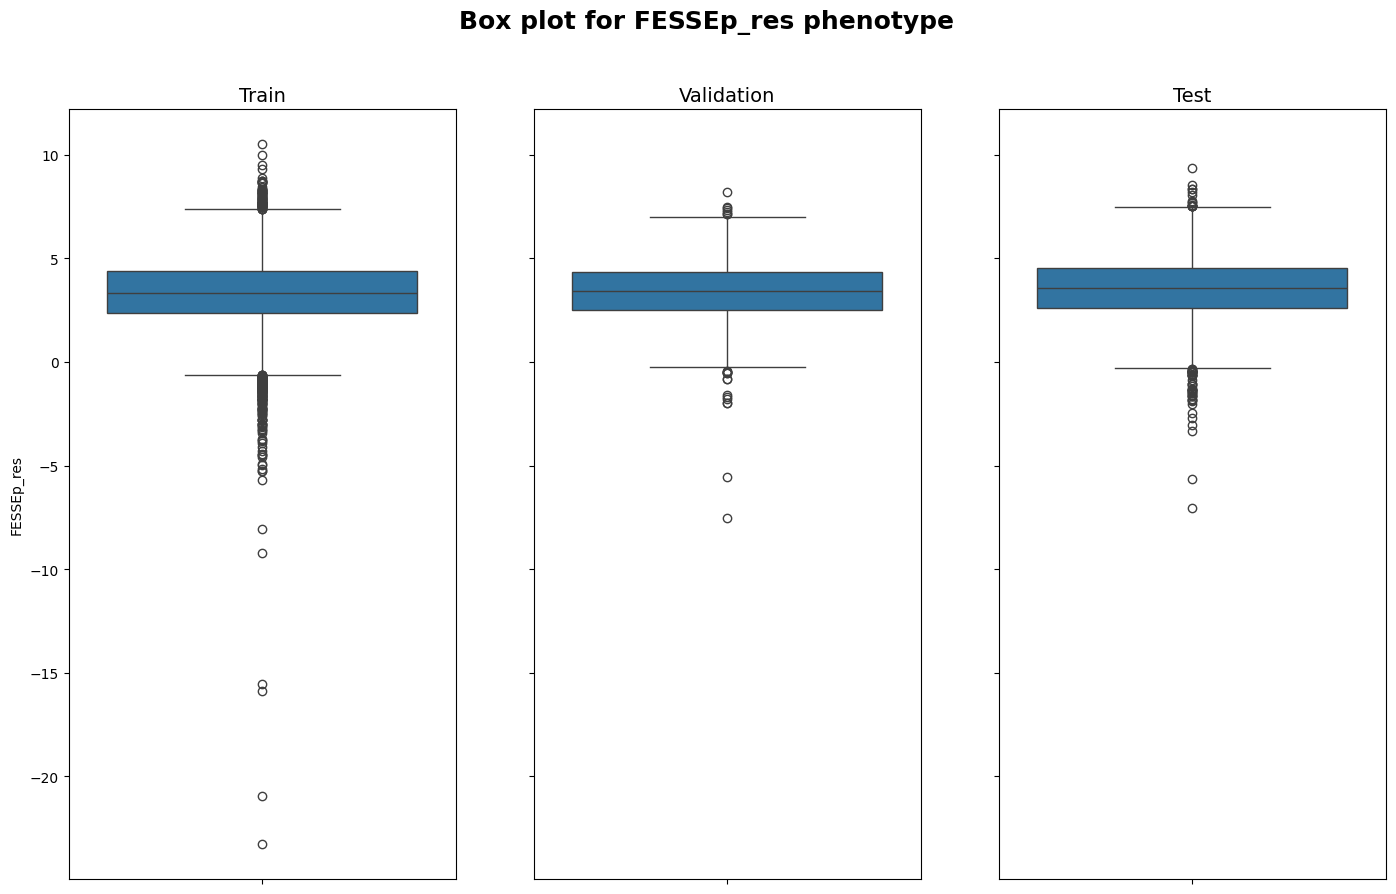

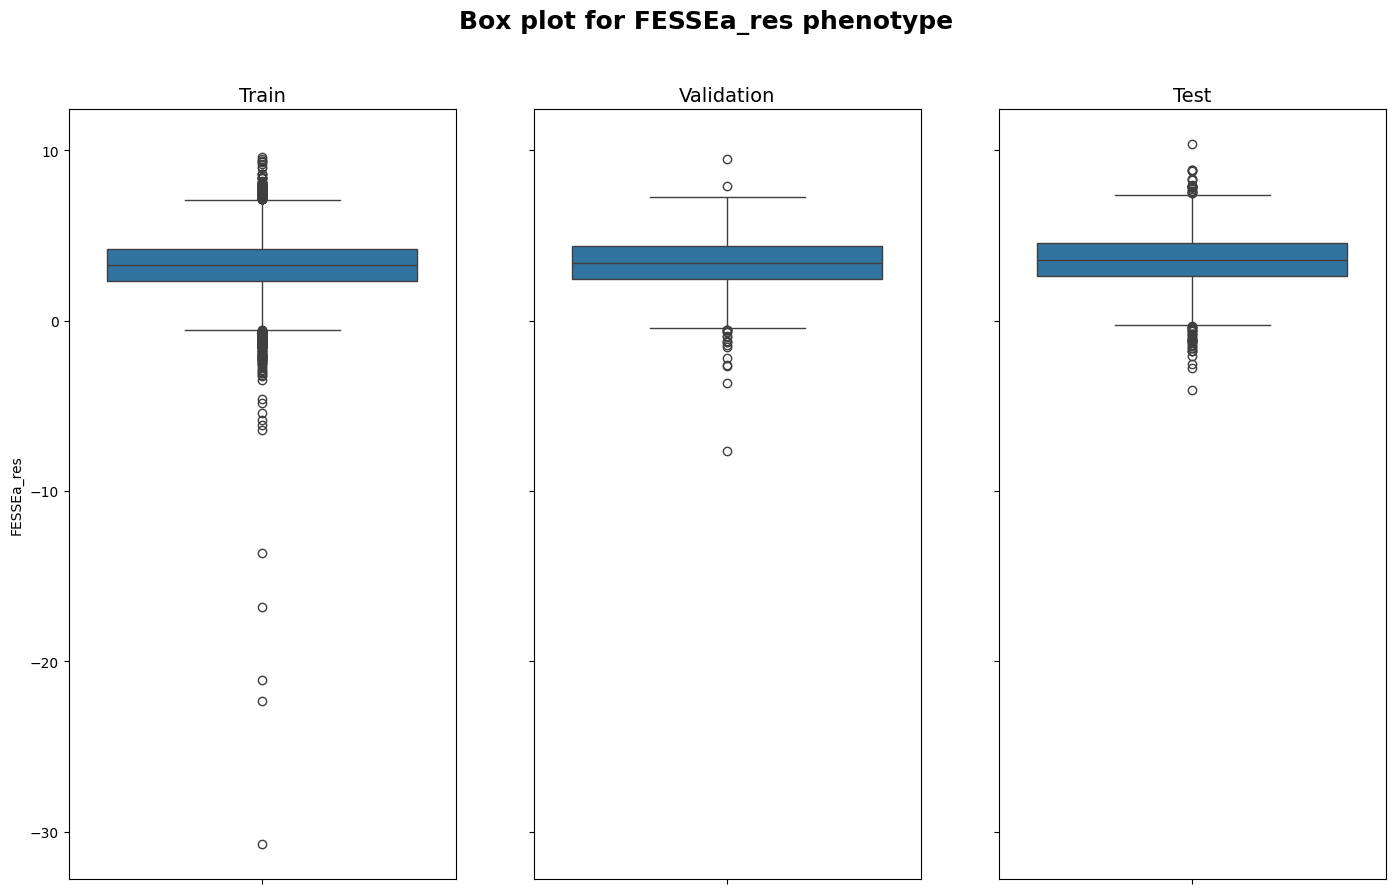

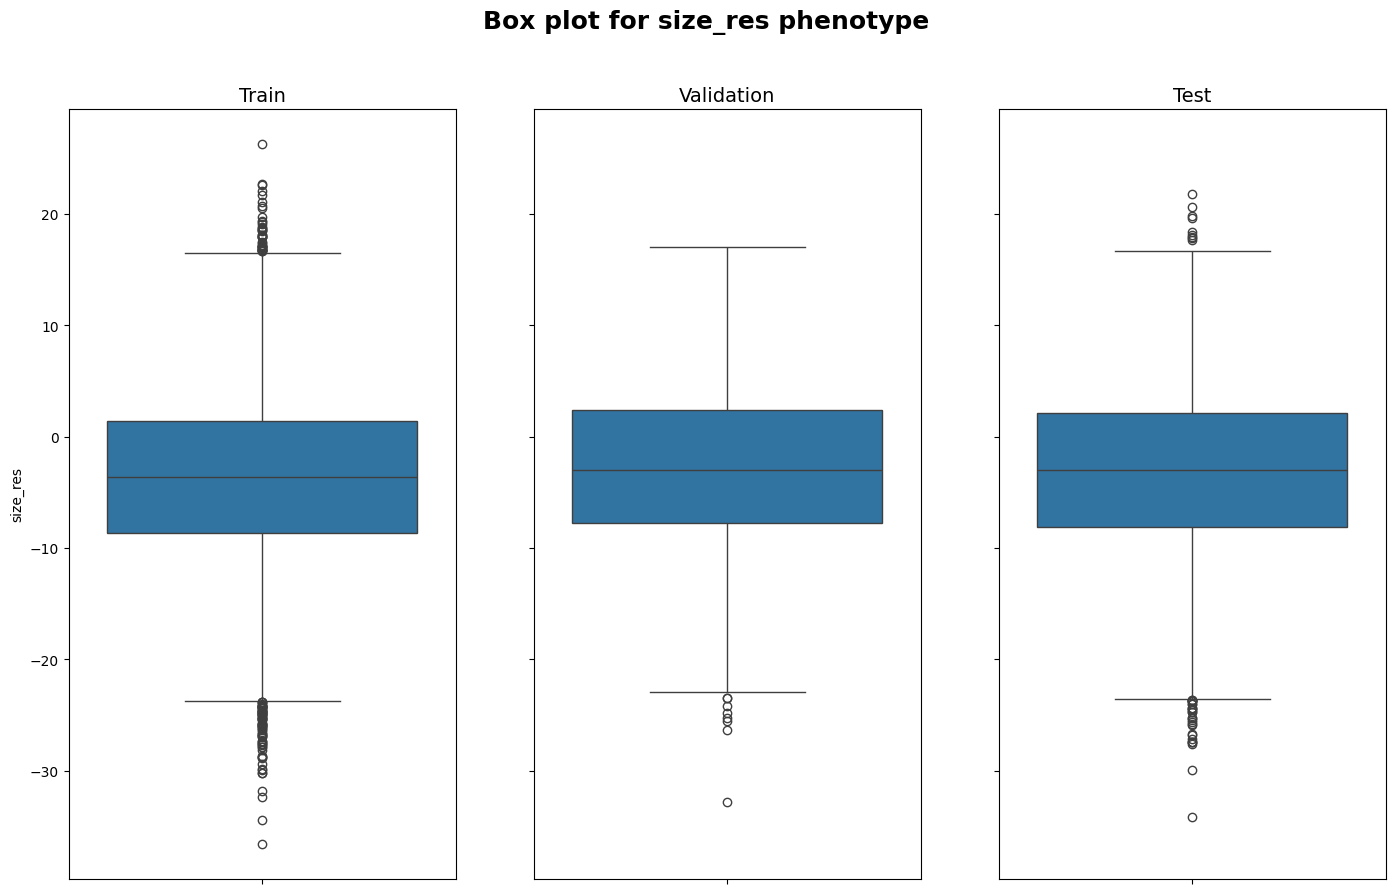

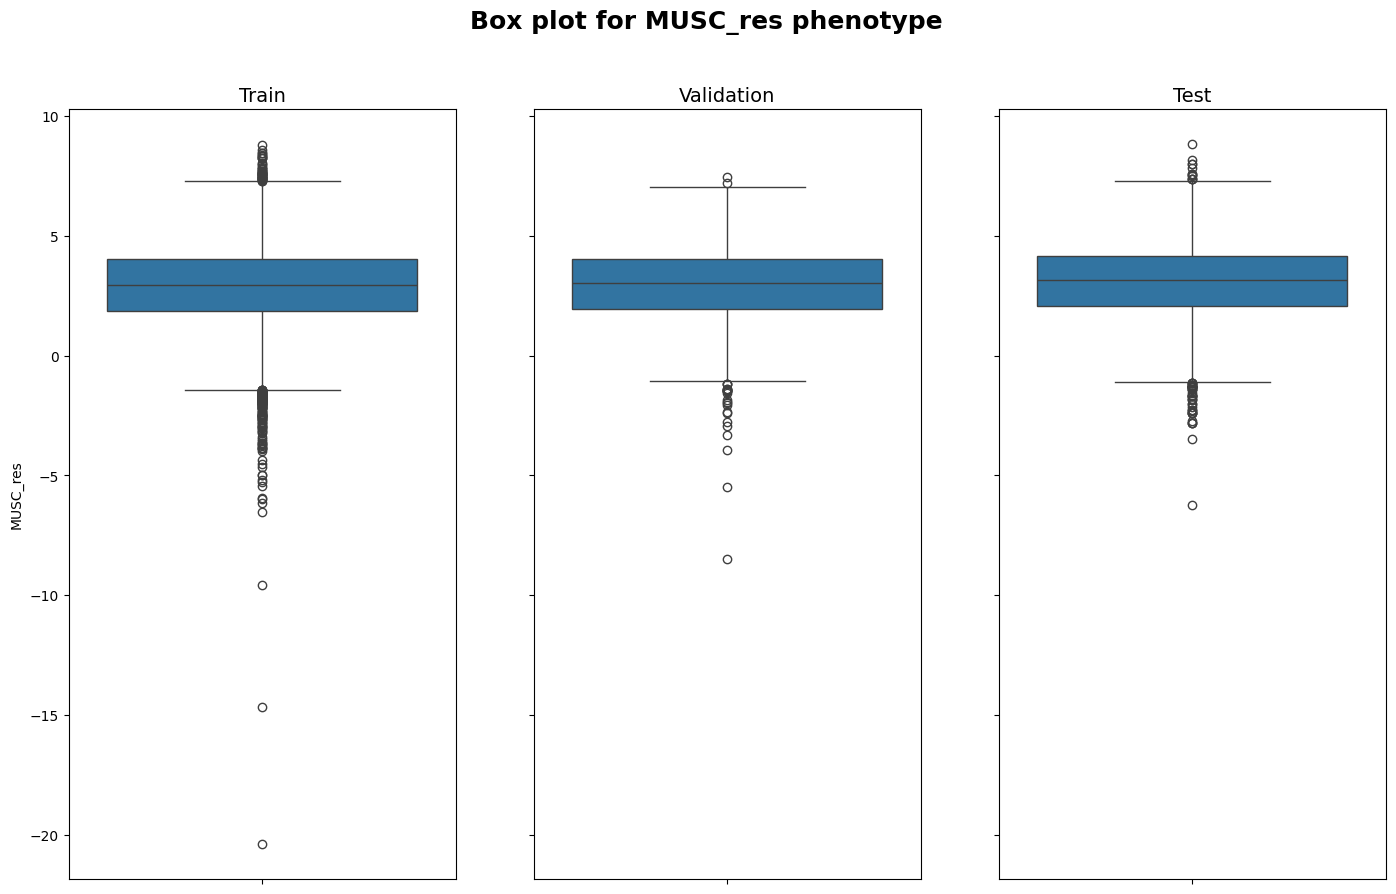

In [5]:
for pheno in train_dataset.phenotypes.keys():
    fig, axs = plt.subplots(1,3, sharey = True, figsize=(17 , 10))
    fig.suptitle(f"Box plot for {pheno} phenotype", font={"weight": "bold" ,"size": 18})
    axs[0].set_title("Train", fontsize = 14)
    axs[1].set_title("Validation", fontsize = 14)
    axs[2].set_title("Test", fontsize = 14)
    sns.boxplot(train_phenotypes_df[pheno], ax = axs[0])
    sns.boxplot(validation_phenotypes_df[pheno], ax = axs[1])
    sns.boxplot(test_phenotypes_df[pheno], ax = axs[2])

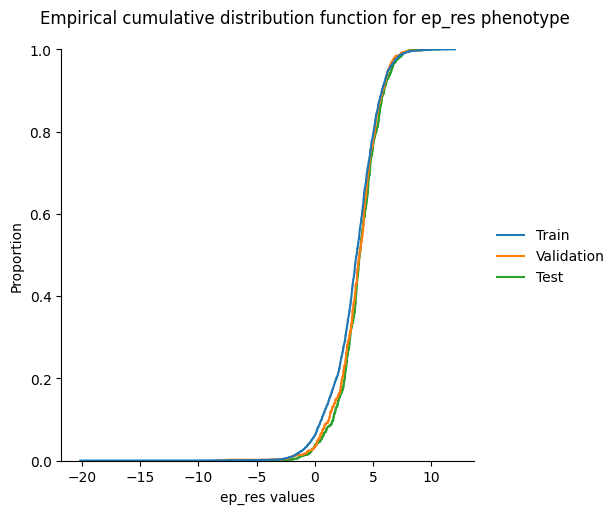

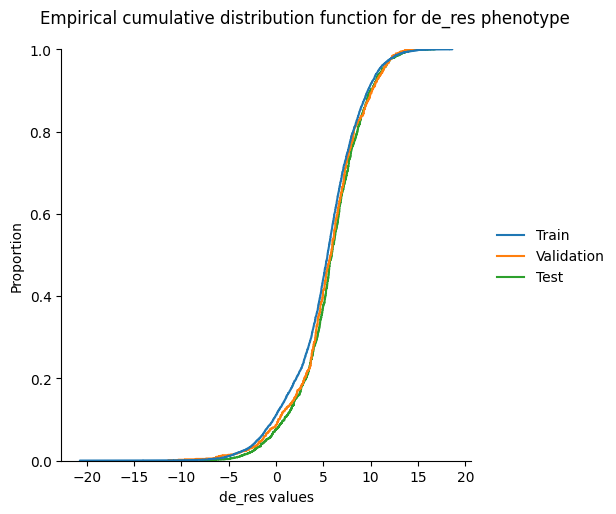

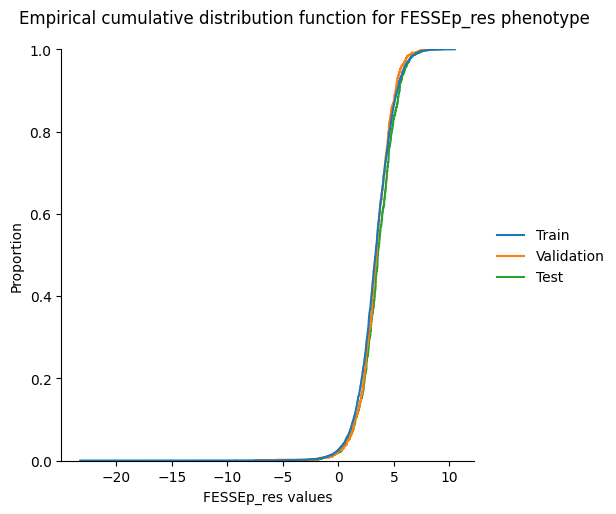

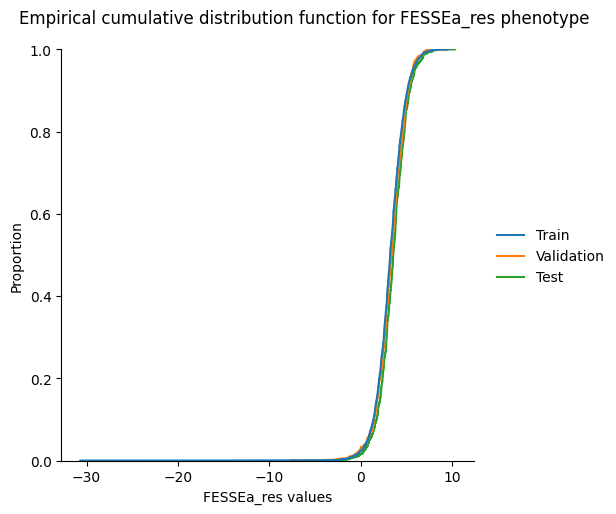

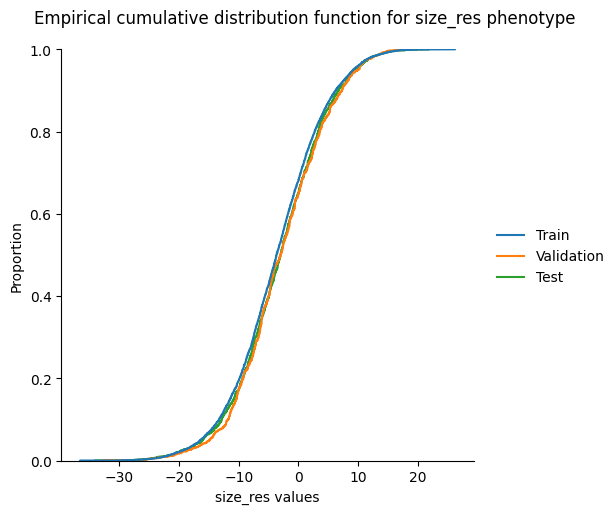

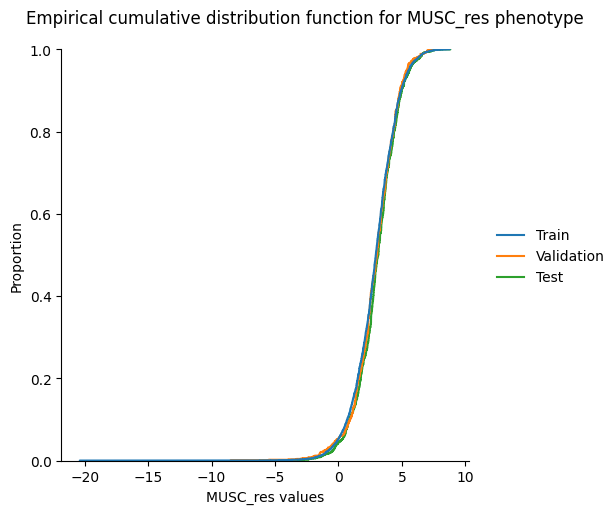

In [6]:
# Visual comparaison via ecdf plots comparaison for the three datasets
for pheno in train_dataset.phenotypes.keys():
    distribution_df = pd.DataFrame([train_phenotypes_df[pheno], validation_phenotypes_df[pheno], test_phenotypes_df[pheno]], index = ["Train", "Validation", "Test"]).transpose()
    plot = sns.displot(distribution_df, kind="ecdf")
    plot.set_xlabels(f"{pheno} values")

    plot.figure.subplots_adjust(top=0.9)
    plot.figure.suptitle(f"Empirical cumulative distribution function for {pheno} phenotype")
    plt.show()

# Local train evaluation

Display some comparaison between the local_train and others dataset to better visualize the distribution in order to provide extra informations in order to explain the better results obtained in deep_MLP while using the local_train dataset. I will here display the kstest with the local_train dataset and all other dataset and the box plot of local_train, train and validation for every phenotype.

In [9]:
local_train_dataset = SNPmarkersDataset(mode="local_train", dir_path="../../Data")
local_train_phenotypes_df = pd.DataFrame.from_dict(local_train_dataset.phenotypes)

In [10]:
for pheno in train_dataset.phenotypes.keys():
    print(f"Two samples ks test for {pheno} : ")
    print(f"Local_train-Train p value: {kstest(local_train_phenotypes_df[pheno].dropna(), train_phenotypes_df[pheno].dropna()).pvalue}")
    print(f"Local_train-Validation p value: {kstest(local_train_phenotypes_df[pheno].dropna(), validation_phenotypes_df[pheno].dropna()).pvalue}")
    print(f"Local_train-Test p value: {kstest(local_train_phenotypes_df[pheno].dropna(), test_phenotypes_df[pheno].dropna()).pvalue}")
    print("--------------------------------------------------------------------------------------------------------------------")

Two samples ks test for ep_res : 
Local_train-Train p value: 0.09751566262390754
Local_train-Validation p value: 3.209982841805882e-05
Local_train-Test p value: 1.3098639092305764e-13
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for de_res : 
Local_train-Train p value: 2.8642096385926355e-05
Local_train-Validation p value: 5.214702601499457e-07
Local_train-Test p value: 9.14033981221323e-15
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for FESSEp_res : 
Local_train-Train p value: 0.015468506052571197
Local_train-Validation p value: 8.974277567313009e-05
Local_train-Test p value: 7.309116437084093e-11
--------------------------------------------------------------------------------------------------------------------
Two samples ks test for FESSEa_res : 
Local_train-Train p value: 0.06983694394309503
Local_t

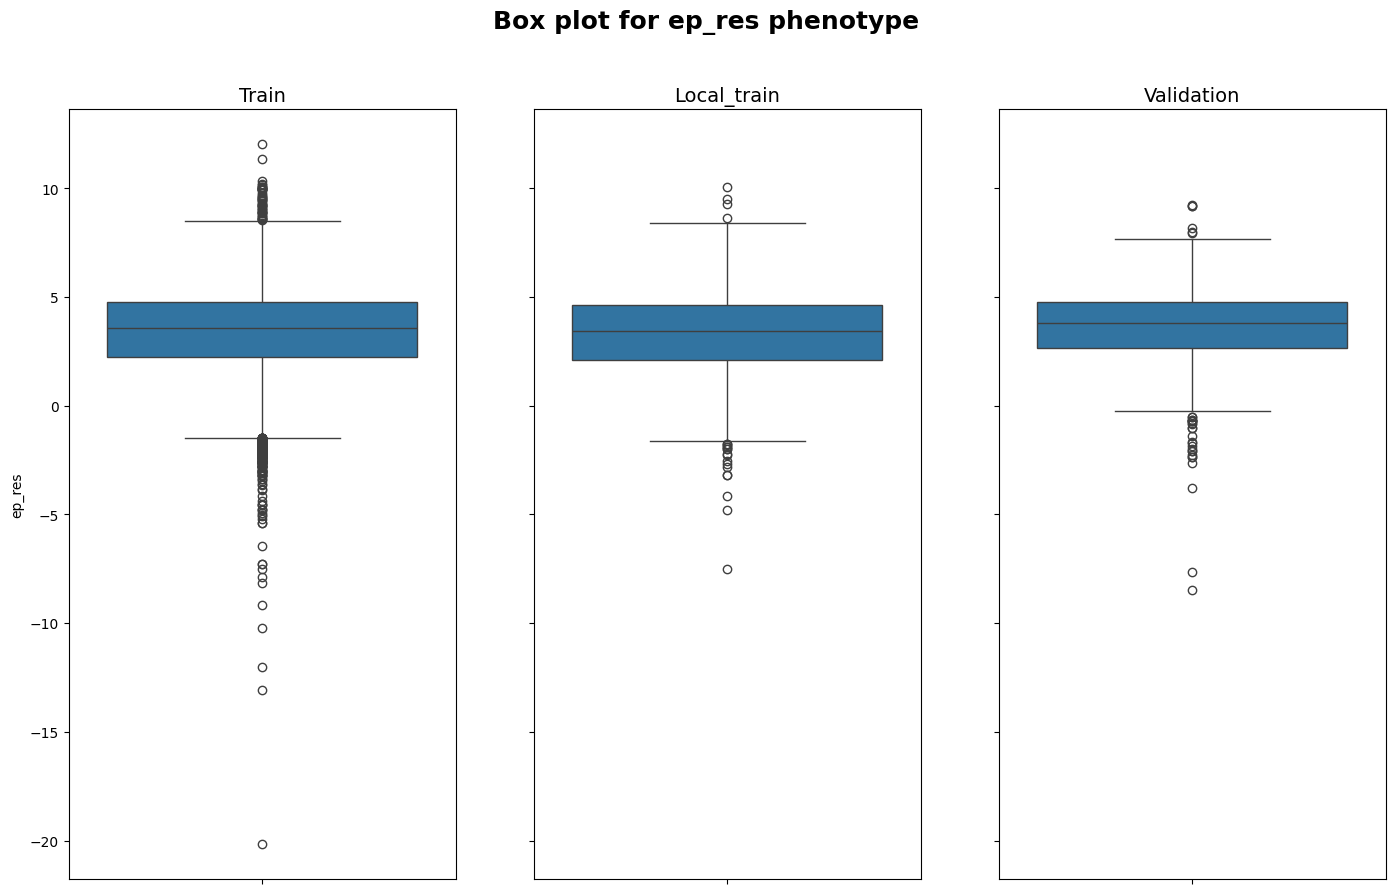

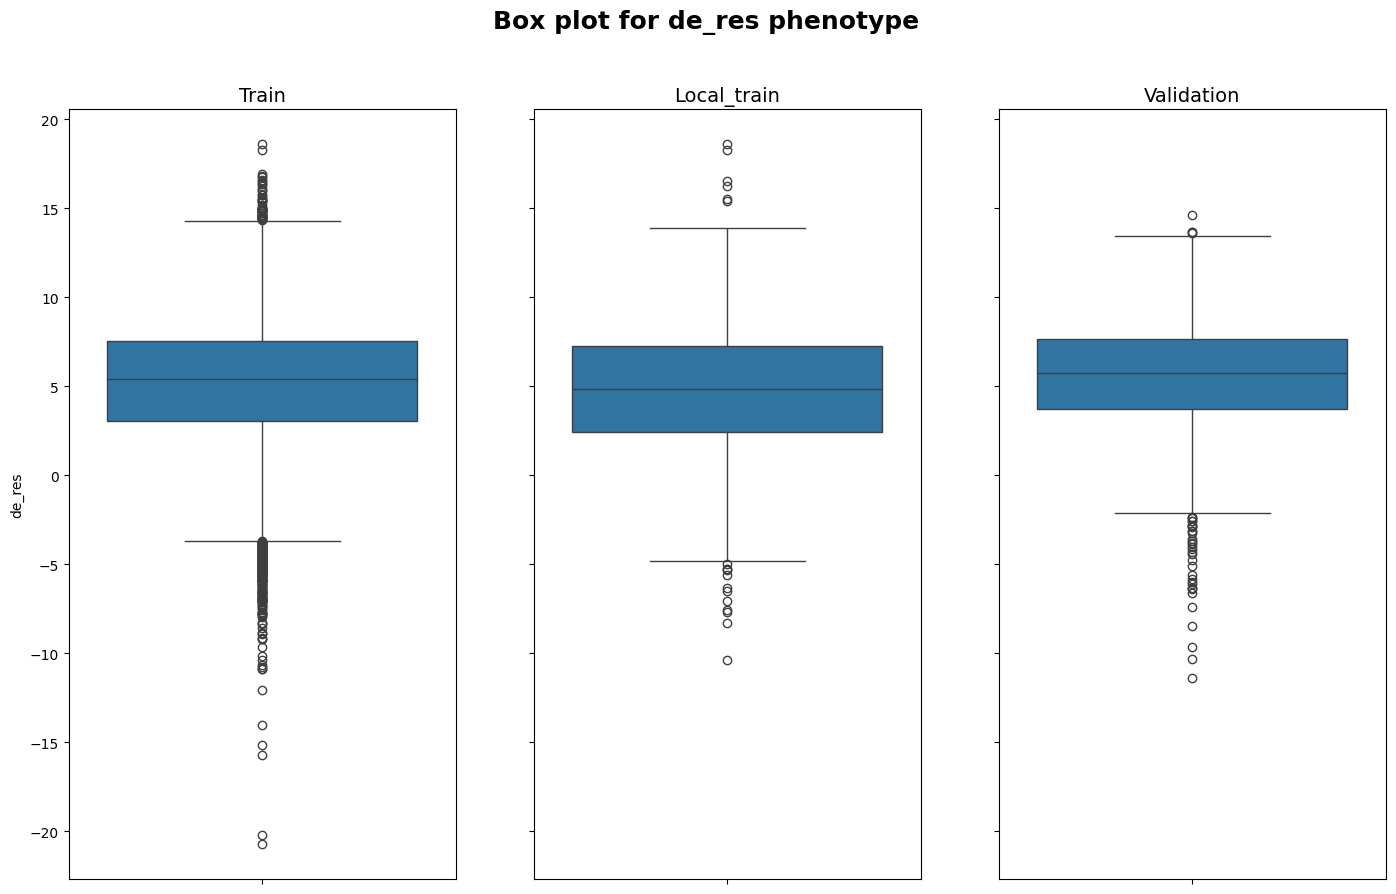

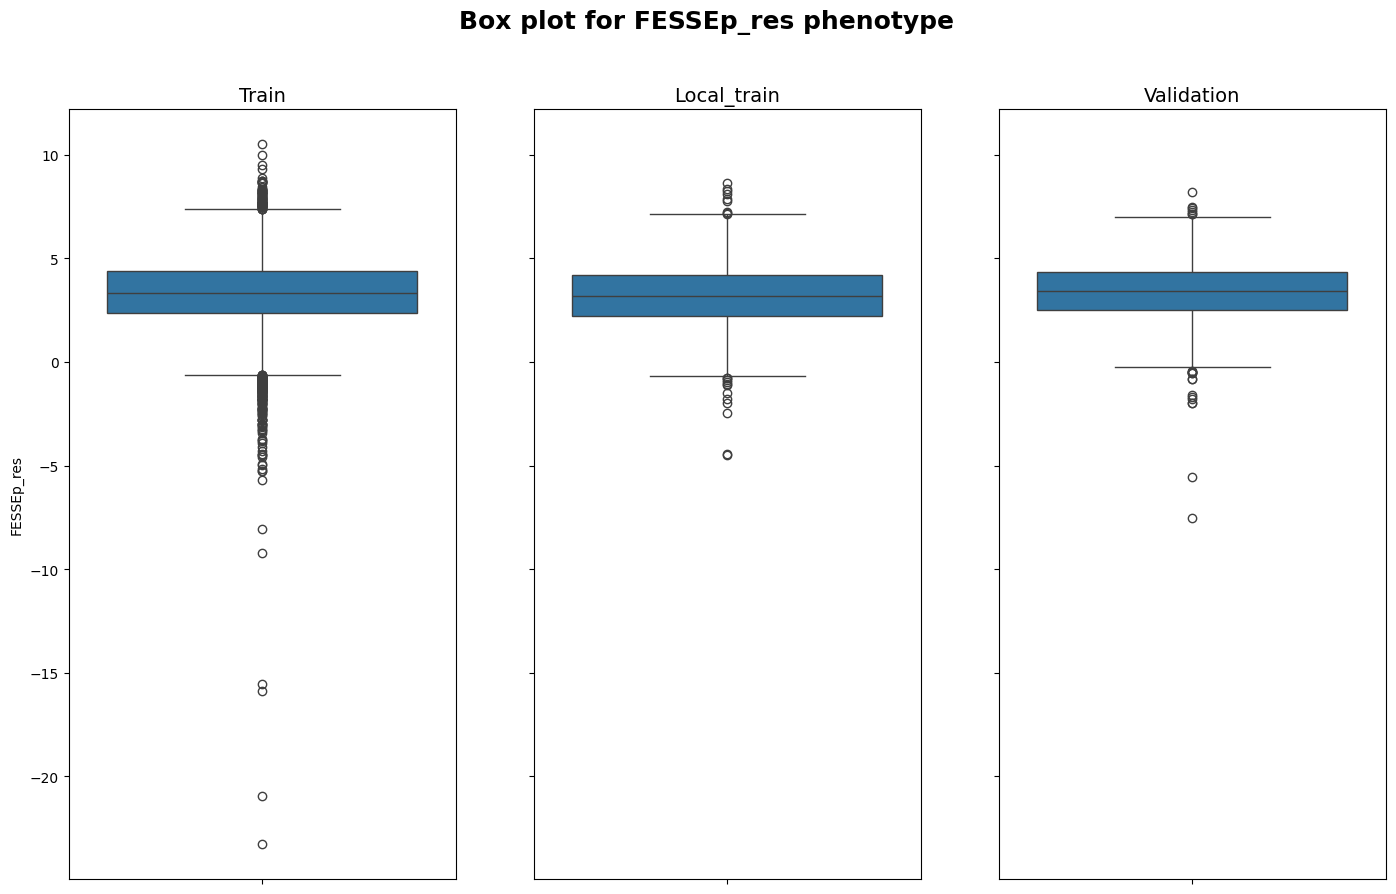

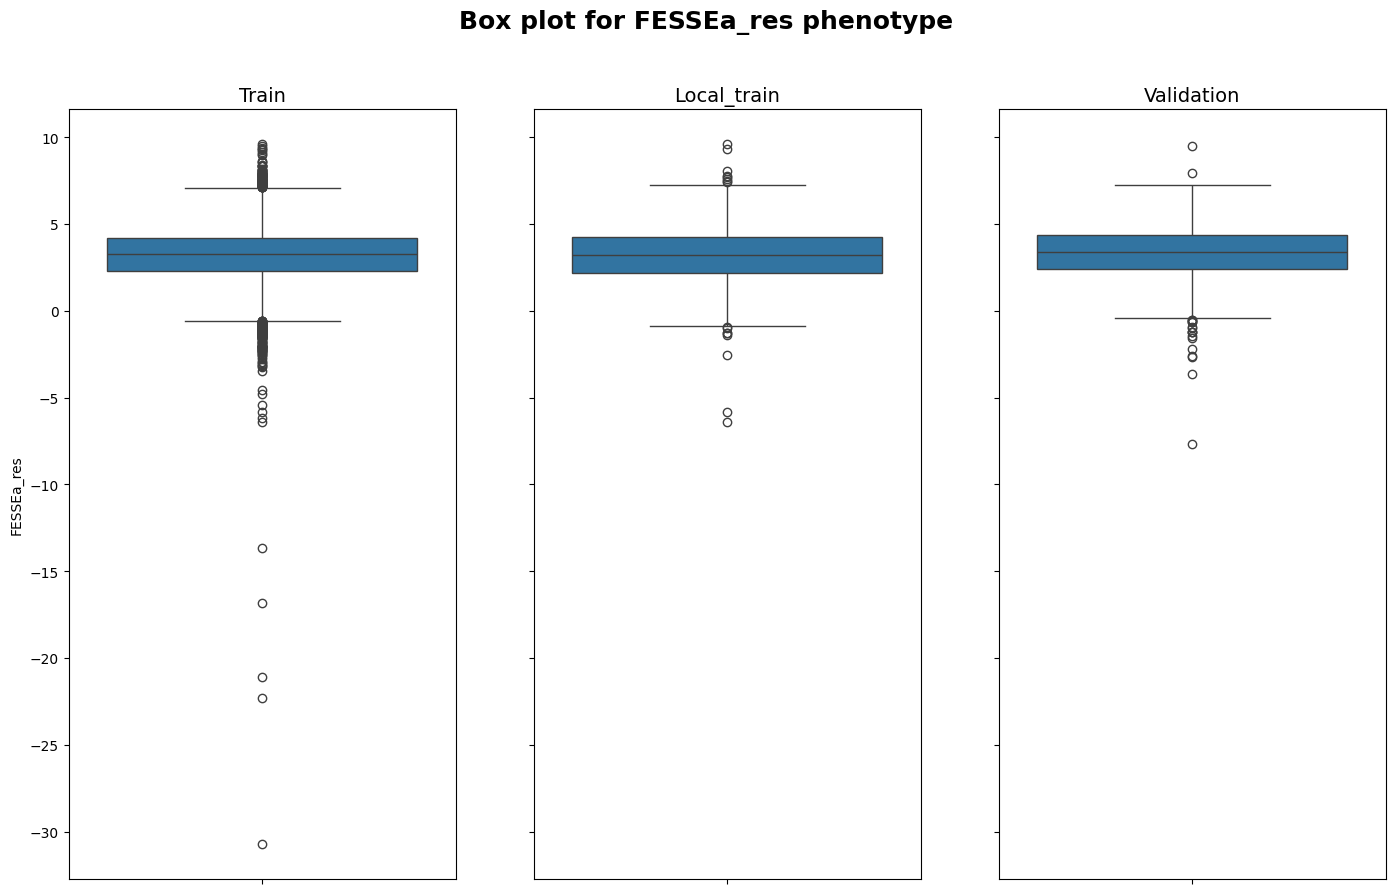

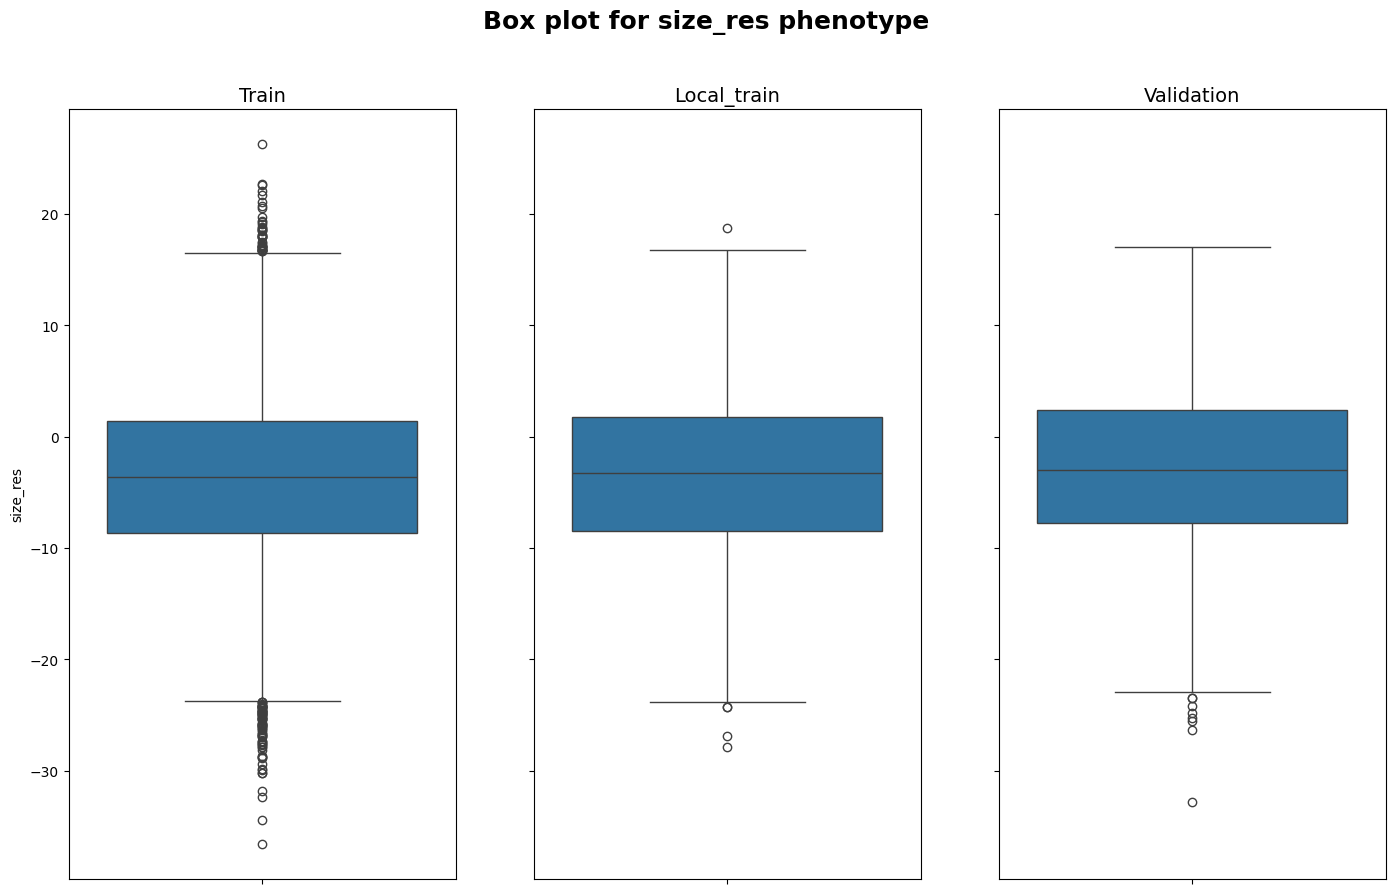

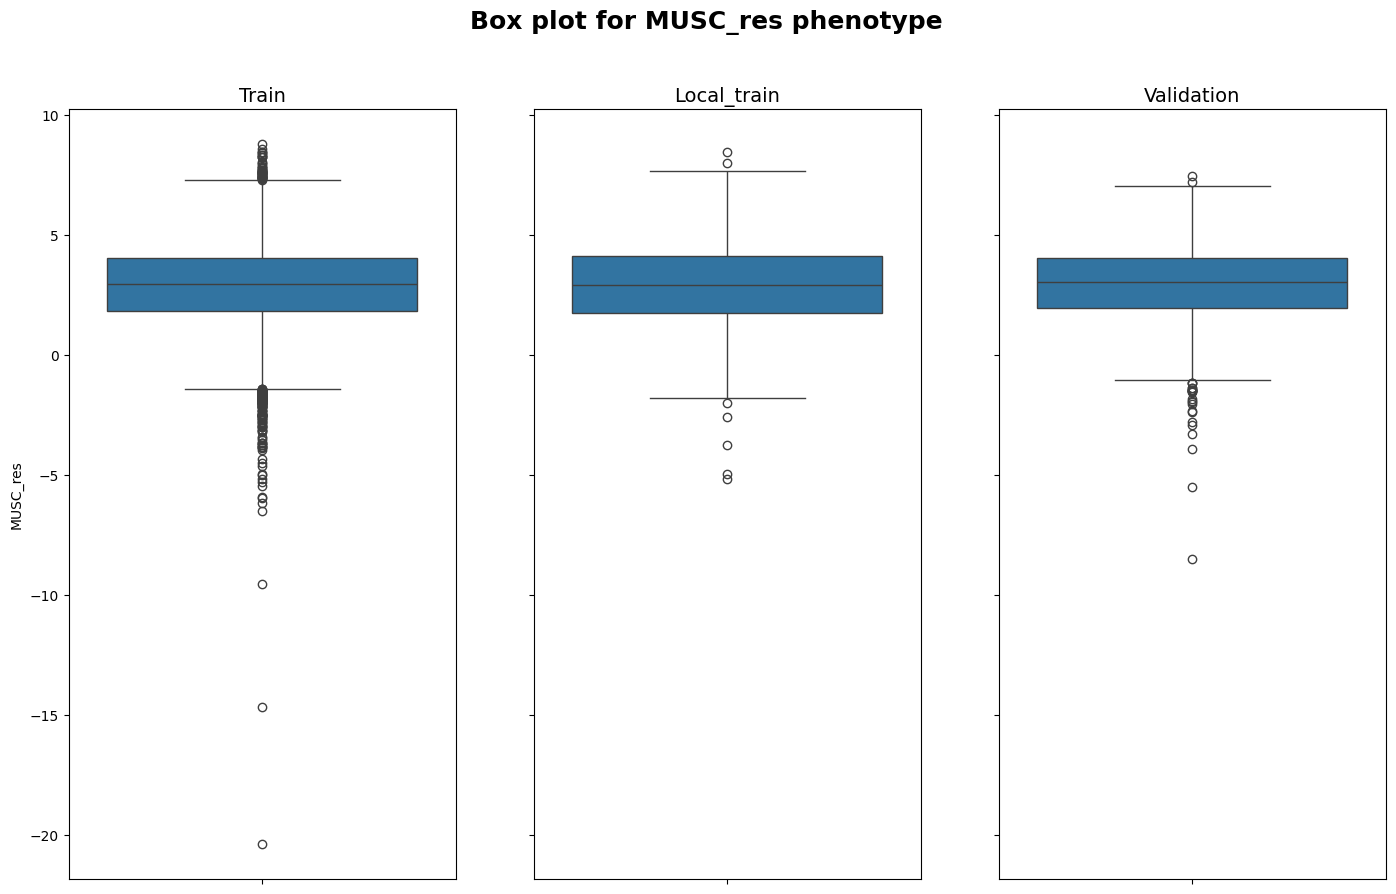

: 

In [ ]:
for pheno in train_dataset.phenotypes.keys():
    fig, axs = plt.subplots(1,3, sharey = True, figsize=(17 , 10))
    fig.suptitle(f"Box plot for {pheno} phenotype", font={"weight": "bold" ,"size": 18})
    axs[0].set_title("Train", fontsize = 14)
    axs[1].set_title("Local_train", fontsize = 14)
    axs[2].set_title("Validation", fontsize = 14)
    sns.boxplot(train_phenotypes_df[pheno], ax = axs[0])
    sns.boxplot(local_train_phenotypes_df[pheno], ax = axs[1])
    sns.boxplot(validation_phenotypes_df[pheno], ax = axs[2])